In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Fourier Modes of heat equation approach

First, I have looked at constructing solutions to the imhomogenous heat equation by decomposing it into Fourier modes. \
I got a lot of guidance and support from the following two textbooks: \
• Partial Differential Equations: An Introduction by Walter A. Strauss - chapters 4 & 5. \
• Introduction to Partial Differential Equations by David Borthwick - chapters 6. 

Amazingly, a lot of this I hadn't seen before. We covered eigenfunction solutions for ODEs in Supplementary, and I covered Fourier Series in my undergrad, but never specifically looked at them for PDEs. Chapter 5 of the first textbook above gives proofs of completeness for using Fourier Series to solve PDEs, which include the imhomogenous heat equation. 

The approach is that we express each term in the heat equation as a combination of orthogonal eigenfunctions over the domain. This approach is justified under fialry loose conditions outlined in Chapter 5 of Strauss' book. I've done this for the following problem, but I can generalise this to other boundary conditions, over different domains and with a nonzero initial conditions function.

$$ 
u_t(x, t) - u_{xx}(x, t) = f(x, t) \quad u(0, t) = u(1, t) = 0, \quad u(x, 0) = 0 \\
\phi(x) = \sin(n \pi x) \\
u(x, t) = \sum_{n=1}^\infty u_n(t) \phi_n(x)\\
u_t(x, t) = \sum_{n=1}^\infty v_n(t) \phi_n(x)\\
u_{xx}(x, t) = \sum_{n=1}^\infty w_n(t) \phi_n(x)\\
f(x, t) = \sum_{n=1}^\infty f_n(t) \phi_n(x)\\
$$

From this, I use orthogonality of the eigenfunctions to obtain expressions for $v_n, w_n, f_n$ and then we combine those to obtain an ODE for $u_n$. This is how it goes:

$$
v_n(t) = 2 \int_0^1 u_t sin(n \pi x) dx = \frac{du_n(t)}{dt}\\
w_n(t) = 2 \int_0^1 u_xx sin(n \pi x) dx = -\lambda_n^2u_n(t) \quad \lambda_n = n\pi\\
f_n(t) = 2 \int_0^1 f(x, t) sin(n \pi x) \\
$$

Then I get an ODE to solve for $u_n(t)$:

$$
u_t - u_xx = f(x, t) \\
\sum_n^\infty (v_n(t) - w_n(t) - f_n(t)) \phi_n(x)\\
\frac{du_n(t)}{dt} + \lambda_n u_n(t) = f_n(t)\\
u_n(t) = \int_0^t e^{\lambda_n(s-t)} f_n(s) ds
$$


That was my maths. Next I used a trial function to verify this is working. I used a time-independent function because I wanted to verify my solution was correct, and some googling said that this function $f(x,t) = f(x) = x(1-x)$ would have a good steady state solution that I could verify.

For this function:

$$
f(x, t) = f(x) = x(1-x) = \sum_{n=1}^\infty f_n \sin(n \pi x)\\
f_n = \frac{4}{n^3 \pi^3}(1-(-1)^n) \\
u_n(t) = \frac{4}{n^5\pi^5}(1-(-1)^n)(1-e^{-n^2 \pi^2 t})\\
u_{ss}'' = f(x) = x(1-x) \\
\text{Apply boundary conditions}\\
u_{ss} = -\frac{x^3}{6} + \frac{x^4}{12} + \frac{x}{12}
$$


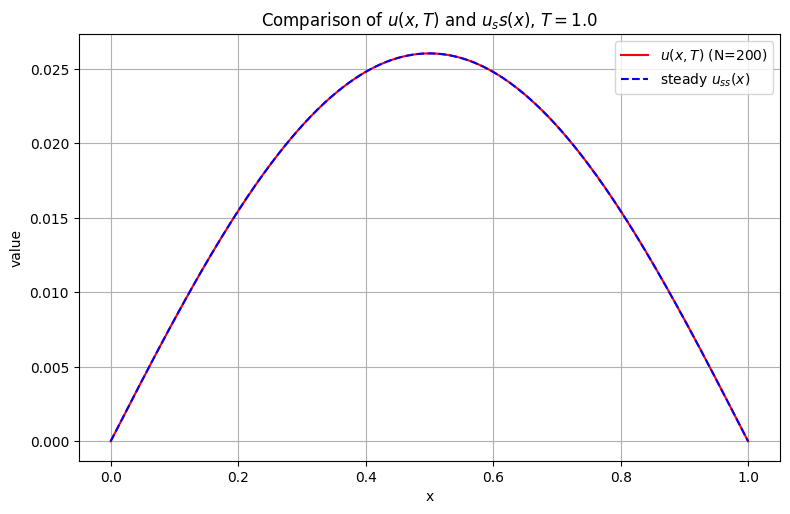

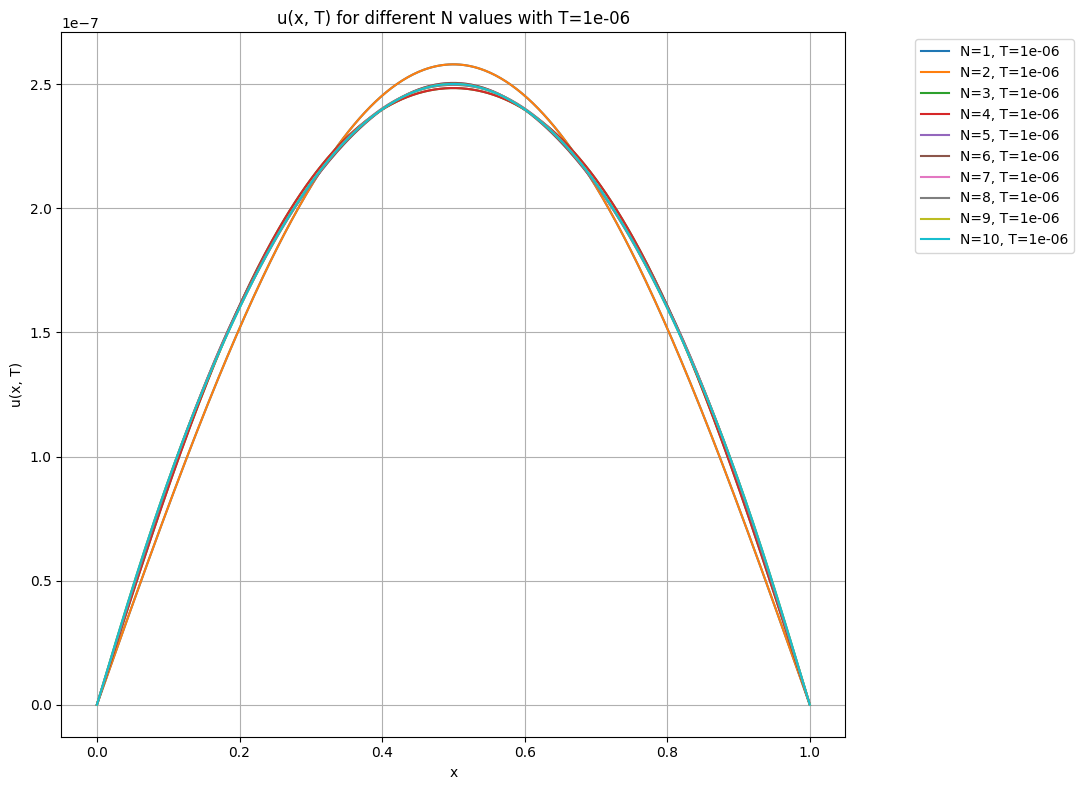

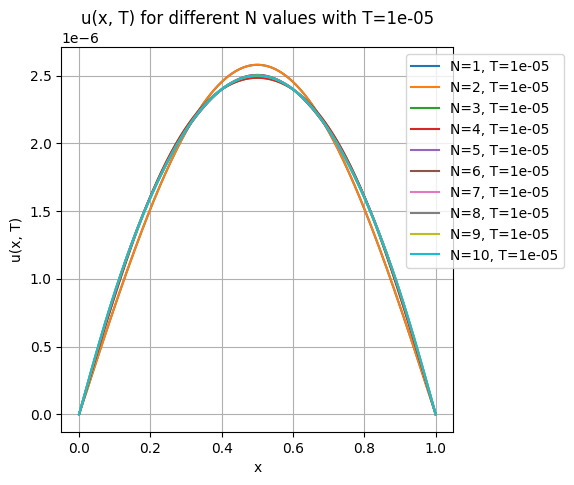

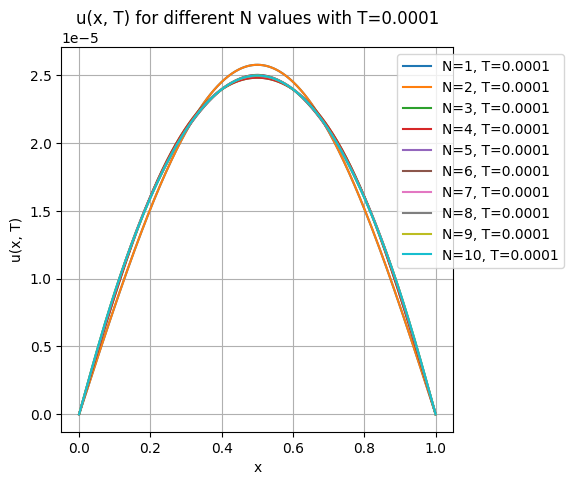

In [40]:
## I am going to verify that my maths is right by doing two things. Firstly, my u that is obtained as a combination of "lots" u_n terms should in the long term converge 
# to the f(x) function. So I will verify that. Secondly, I will verify that as I add more u_n terms, the error between f(x) and u(x) decreases. 
# I will do the first of these as a sense check in itself, and for the second one I will plot u(x) for multiple values of N over different time horizons.

# So to do this, I need 2 functions. I need f(x) and u(x,t) as a function of N, x and t.

ff = lambda x: x * (1-x)  # This is the function f(x) = x(1-x)
u_ss = lambda x: -x**3 / 6 + x**4 / 12 + x / 12
phi = lambda x, n: np.sin(n * np.pi * x)

def uu(x, t, N):
    sum_terms = 0
    for n in range(1, N + 1):
        u_n = 4 / (n**5 * np.pi**5) * (1 - (-1)**n) * (1 - np.exp(-n**2 * np.pi**2 * t))
        sum_terms += u_n * phi(x, n)
    return sum_terms



x_grid = np.linspace(0, 1, 400)
T, N = 1e-0, 200 
u_numeric = uu(x_grid, T, N)

plt.figure(figsize=(8,5))
plt.plot(x_grid, u_numeric, 'r', label=r'$u(x,T)$ (N=200)')
plt.plot(x_grid, u_ss(x_grid), 'b--', label='steady $u_{ss}(x)$')
plt.legend(); plt.xlabel('x'); plt.ylabel('value'); plt.tight_layout()
plt.title(rf'Comparison of $u(x,T)$ and $u_ss(x)$, $T={T}$')
plt.grid()
plt.show()

# Ok those line up perfectly, that's good. Now I will plot u(x) for different values of N over a range of T values to see how the error decreases as N increases.

T_values = [1e-6, 1e-5, 1e-4]
N_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 8))
for T in T_values:
    for N in N_values:
        u_numeric = uu(x_grid, T, N)
        plt.plot(x_grid, u_numeric, label=f'N={N}, T={T}')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('u(x, T)')
    plt.title(f'u(x, T) for different N values with T={T}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

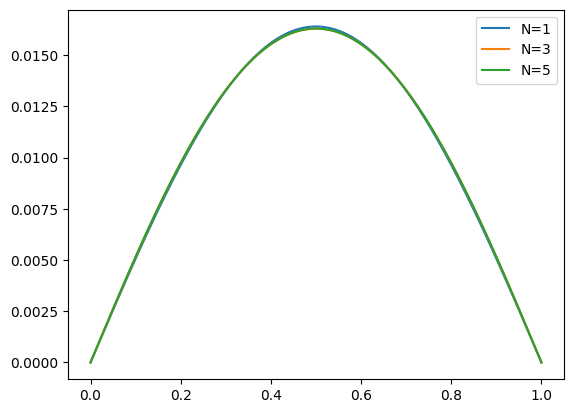

In [45]:
x_grid = np.linspace(0, 1, 400)
u_numeric = uu(x_grid, 0.1, 1)
plt.plot(x_grid, u_numeric, label='N=1')
plt.plot(x_grid, uu(x_grid, 0.1, 3), label='N=3')
plt.plot(x_grid, uu(x_grid, 0.1, 5), label='N=5')
plt.legend()

Now we change $f(x, t) = \xi(x, t)$.

Same approach is justified, and $\xi$ is now treated as:

$$
u_t - u_xx = \xi(x,t)\\
\xi(x,t) = \sum_{n=1}^\infty \dot{B}_n(t) \phi_n(x) \text{Where $\dot{B}$ is the time derivative of Brownian motion. Note: Need to better expore why this treatment is justified. I had it and have since forgotten. Slow brain} \\
\sum(v_n(t) - w_n(t) - \dot{B}_n(t))\phi(x) = 0\\
\frac{du_n}{dt} + \lambda_n^2 u_n = \frac{dB_n}{dt} \\
du_n = \lambda_n^2 u_n dt + dB_n \text{This is the OU process Prof. Giles spoke about. Has a known solution. Normally distributed.}\\
u_n(t) = e^{-\lambda_n^2 t} \int_0^t e^{\lambda_n^2 s}dB_n(s)\\
u_n(t) \sim \mathcal{N}(0, \frac{1-e^{-2\lambda_n^2 t}}{2\lambda_n^2}) \quad \text{Note: as t $\to \infty$, converge to constant variance for all $n$}
$$


Now profssor Giles has suggested that I use the amplitude of Fourier modes as a QoI. What does this mean? We calculate:

$$
u_n(t) = \langle u(t), \phi_n(x) \rangle = 2 \int_0^1 u(x,t) \sin(n \pi x) dx. \quad \text{We make this the quantity of interest, I think. Prof. Giles said amplitude, and this doesn't look quite like an amplitude though is all.} \\
\text{Amplitude is: } \sqrt{a_n^2 + b_n^2} = |b_n| \text{As sine series only}
$$

So my goal (check this with Professor Giles) is to use the MLMC method to to approximate $u_n(t) = 2 \int_0^1 u(x,t) \sin(n \pi x) dx$. I can use the forward difference scheme to obtain approximations for $u(x,t)$, and take the integral of that approximate integral of that quantity with $\sin(n \pi x)$ for different $n$, and that is my QoI. To benchmark, I know that this should be approximately normally distributed and how its variance should vary. I can use a statistical test to examine how close to normally distirbuted it is.  

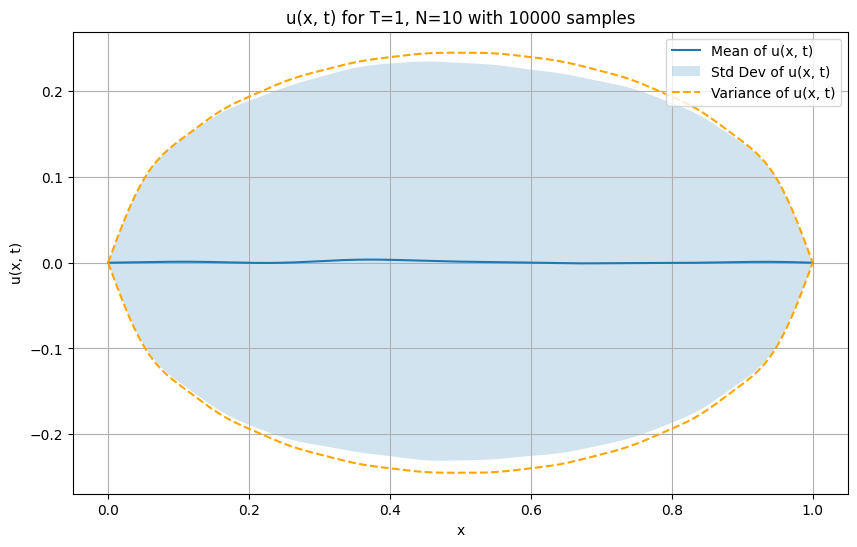

In [51]:
# Those also seem to work. That's good, I think my approach is correct. Now let's move onto considering what happens when f(x, t) is xi(x, t), i.e. white noise.
# Goal again from Prof Giles: This makes it a good testcase because if we take the output QoI (quantity of interest) to be the amplitude of a particular Fourier mode then we know 
# it is Normally distributed with a known amplitude, and you can check your numerics reproduces that.


# So Professor Giles suggests that I use MLMC and MC to verify that the integral of u(x, t) * sin(n pi x) converges to a normall distributed variable with mean 0 and 
# variance (1 - e^(-2 * n^2 pi^2 t)) / (2 * n^2 * pi^2) as n increases.

# Let's first verify that my u(x, t) is correct by plotting the first few Fourier modes of u(x, t) for a given t and looking at what the variance of these converge to.

u_n = lambda n, t: np.random.normal() * np.sqrt((1 - np.exp(-2 * n**2 * np.pi**2 * t)) / (2 * n**2 * np.pi**2))

def var_u(N, t, x):
    sum_terms = 0
    for n in range(1, N + 1):
        lam = n**2 * np.pi**2
        term = np.sin(n * np.pi * x)**2 * (1 - np.exp(-2 * lam * t)) / (2 * lam)
        sum_terms += term
    return sum_terms

def uu(x, t, N):
    sum_terms = 0
    for n in range(1, N + 1):
        sum_terms += u_n(n, t) * phi(x, n)
    return sum_terms

T, N = 1, 10
num_samples = 10000
x_grid = np.linspace(0, 1, 400)
u_samples = np.zeros((num_samples, len(x_grid)))
for i in range(num_samples):
    u_samples[i, :] = uu(x_grid, 0.1, 10)

var = var_u(N, T, x_grid)

plt.figure(figsize=(10, 6))
plt.plot(x_grid, u_samples.mean(axis=0), label='Mean of u(x, t)')
plt.fill_between(x_grid, u_samples.mean(axis=0) - u_samples.std(axis=0), 
                 u_samples.mean(axis=0) + u_samples.std(axis=0), alpha=0.2, label='Std Dev of u(x, t)')
plt.plot(x_grid, np.sqrt(var), label='Variance of u(x, t)', linestyle='--', color='orange')
plt.plot(x_grid, -np.sqrt(var), linestyle='--', color='orange')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title(f'u(x, t) for T={T}, N={N} with {num_samples} samples')
plt.legend()
plt.grid()
plt.show()


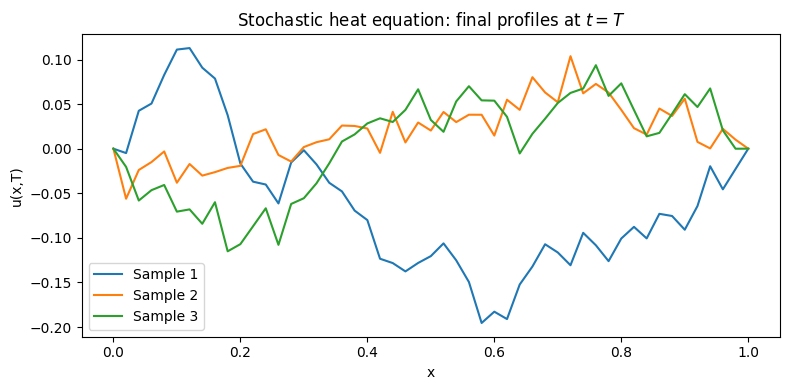

In [55]:
# I suppose all I did there was verify that my normally distributed random variables had the correct variance (i.e. that they're normally distributed).
# So our QoI should is going to be u_1. u_1 is the first Fourier mode, so it is the first term in the series expansion of u(x, t).
# u_n = 2 * integral from 0 to 1 (u(x, t) * sin(n pi x)) dx


# So steps, first construct an MC for estimating u(x,t) via a finite difference scheme, and we will see if that lines up with our QoI.

Nx = 51
dx = 1/(Nx - 1)
T = 0.2
dt = 1e-4
sigma = 0.2
nsamp = 3
plot_every = 20

nsteps = int(T/dt)
x = np.linspace(0.0, 1.0, Nx)
final_profiles = np.zeros((nsamp, Nx))
uhistory = np.zeros((nsteps // plot_every + 1, Nx))
uhistory.shape

for s in range(nsamp):
    u = np.zeros(Nx)
    save_idx = 0

    for n in range(nsteps):

        # finite-difference Laplacian
        lap = (np.roll(u, -1) -2.0 * u + np.roll(u, 1)) / dx**2
        lap[0] = lap[-1] = 0.0

        # additive space-time white noise increment
        dW = sigma * np.sqrt(dt/dx) * np.random.randn(Nx)
        dW[0] = dW[-1] = 0.0

        # Euler-Maruyama update
        u += dt * lap + dW

        if s == 0 and n % plot_every == 0:
            uhistory[save_idx] = u
            save_idx += 1

    final_profiles[s] = u

plt.figure(figsize=(8, 4))
for s in range(nsamp):
    plt.plot(x, final_profiles[s], label=f"Sample {s+1}")
plt.title("Stochastic heat equation: final profiles at $t=T$")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.legend()
plt.tight_layout()
plt.show()


def u_scheme(T, nx, lam):
    dx = 1 / (nx - 1)
    dt = lam * dx**2
    nsteps = int(T / dt)
    u = np.zeros((nx, nsteps + 1))
    x = np.linspace(0, 1, nx)
    i = np.arange(1, nx)
    std_dev = np.sqrt(dt / dx)
    for n in range(nsteps):
        dW = np.random.normal(0, std_dev, nx-2)
        u[i, :] += lam * (uf[i+1, :] -2 * u[i, :] + u[i-1, :]) + dW
    return u





In [ ]:
T = 1
lam = 0.25
nx = 51
u = u_scheme(T, nx, lam)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])